In [152]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [204]:
# Load your data from different files
schools = pd.read_csv('schools.csv')
courses = pd.read_csv('courses.csv')
badges = pd.read_csv('badges.csv')
comments = pd.read_csv('comments.csv')
locations = pd.read_csv('locations.csv')

In [179]:
comments = comments.drop_duplicates(subset='id')

In [180]:

comments[['graduatingYear','overallScore','overall','curriculum','jobSupport']] = comments[['graduatingYear','overallScore','overall','curriculum',
                                                                                  'jobSupport']].fillna(0).astype(int)

locations[['city.id', 'country.id','state.id']] = locations[['city.id', 'country.id','state.id']].fillna(0).astype(int)

In [205]:
print(schools.columns)


Index(['Unnamed: 0', 'website', 'description', 'LogoUrl', 'school',
       'school_id', 'ranking'],
      dtype='object')


In [206]:

# Select columns you want to combine

schools_selected_columns = schools[['school_id', 'school', 'ranking']]
courses_selected_columns = courses[['school_id', 'school', 'courses']]
badges_selected_columns = badges[['keyword','school','school_id']]
locations_selected_columns = locations[['id', 'country.id', 'country.name','country.abbrev', 'city.id', 
                                       'city.name','city.keyword', 'state.id', 'state.name', 'state.abbrev', 
                                       'state.keyword', 'school', 'school_id']]
comments_selected_columns =comments[['id','graduatingYear', 'jobTitle', 'tagline', 'program', 'overallScore', 
                                     'overall', 'curriculum', 'jobSupport', 'review_body', 'school']]




In [207]:


# Merge the tables based on the common key 'school_id'
merged_data = pd.merge(schools_selected_columns, comments_selected_columns, on='school', how='inner')
merged_data = pd.merge(merged_data, courses_selected_columns, on='school_id', how='inner')
merged_data = pd.merge(merged_data, badges_selected_columns, on='school_id', how='inner')
merged_data = pd.merge(merged_data, locations_selected_columns, on='school_id', how='inner')


display(merged_data)


/var/folders/q5/5zcd6_2115553r1tvx9_1vk40000gn/T/ipykernel_35720/1650254687.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'school_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_data = pd.merge(merged_data, locations_selected_columns, on='school_id', how='inner')


,school_id,school_x,ranking,id_x,graduatingYear,jobTitle,tagline,program,overallScore,overall,...,country.name,country.abbrev,city.id,city.name,city.keyword,state.id,state.name,state.abbrev,state.keyword,school_y
0,10828,ironhack,16,306372,2023,International Negotiator,The Most Intense Academic Challenge,Data Analytics Bootcamp,3,3,...,Germany,DE,31156,Berlin,berlin,0,NaN,NaN,NaN,ironhack
1,10828,ironhack,16,306372,2023,International Negotiator,The Most Intense Academic Challenge,Data Analytics Bootcamp,3,3,...,Mexico,MX,31175,Mexico City,mexico-city,0,NaN,NaN,NaN,ironhack
2,10828,ironhack,16,306372,2023,International Negotiator,The Most Intense Academic Challenge,Data Analytics Bootcamp,3,3,...,Netherlands,NL,31168,Amsterdam,amsterdam,0,NaN,NaN,NaN,ironhack
3,10828,ironhack,16,306372,2023,International Negotiator,The Most Intense Academic Challenge,Data Analytics Bootcamp,3,3,...,Brazil,BR,31121,Sao Paulo,sao-paulo,0,NaN,NaN,NaN,ironhack
4,10828,ironhack,16,306372,2023,International Negotiator,The Most Intense Academic Challenge,Data Analytics Bootcamp,3,3,...,France,FR,31136,Paris,paris,0,NaN,NaN,NaN,ironhack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4704794,10683,dataquest,-1,242172,2016,NaN,"Great platform, very close to being amazing!",NaN,4,4,...,NaN,NaN,0,NaN,NaN,1,Online,Online,online,dataquest
4704795,10683,dataquest,-1,233819,2017,Student,A well-structured data science course,Data Science,5,5,...,NaN,NaN,0,NaN,NaN,1,Online,Online,online,dataquest
4704796,10683,dataquest,-1,233819,2017,Student,A well-structured data science course,Data Science,5,5,...,NaN,NaN,0,NaN,NaN,1,Online,Online,online,dataquest
4704797,10683,dataquest,-1,233819,2017,Student,A well-structured data science course,Data Science,5,5,...,NaN,NaN,0,NaN,NaN,1,Online,Online,online,dataquest


In [209]:
print(merged_data.columns)

Index(['school_id', 'school_x', 'ranking', 'id_x', 'graduatingYear',
       'jobTitle', 'tagline', 'program', 'overallScore', 'overall',
       'curriculum', 'jobSupport', 'review_body', 'school_y', 'courses',
       'keyword', 'school_x', 'id_y', 'country.id', 'country.name',
       'country.abbrev', 'city.id', 'city.name', 'city.keyword', 'state.id',
       'state.name', 'state.abbrev', 'state.keyword', 'school_y'],
      dtype='object')


In [344]:
merged_data.to_csv('merged_data.csv', index=False)

In [44]:

with pd.option_context("display.max_rows", None):
    unique_job_titles = comments['jobTitle'].dropna().unique()
    print(len(unique_job_titles), "unique job titles:")
    print(unique_job_titles)
    
# There are too many functions. Keep looking for other correlations.

2577 unique job titles:
['International Negotiator' 'Full stack development'
 'Full Stack Web Developer' ... 'PhD Student' 'Ingeniero' 'Analytics Lead']


In [131]:

country_count = merged_data['country.name'].nunique()
print(country_count)

37


In [132]:
city_count = merged_data['city.name'].nunique()
print(city_count)

183


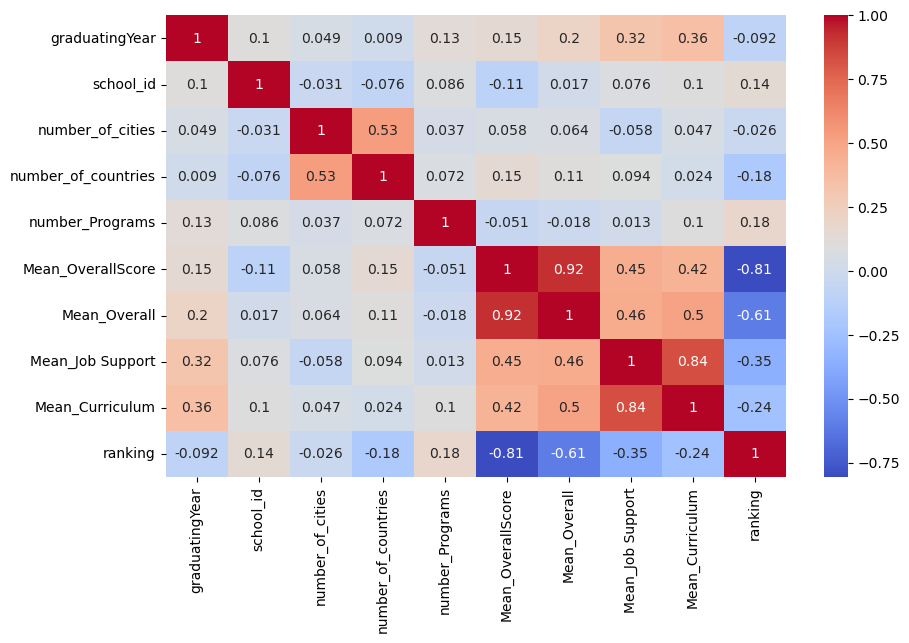

In [342]:
# Use a heatmap to visualize the correlation matrix between multiple variables.


plt.figure(figsize=(10, 6))
sns.heatmap(grouped_data.corr(), annot=True, cmap='coolwarm')
plt.show()




In [ ]:
"""The observed correlation suggests that the number of programs offered by a school may influence 
its overall score. Specifically, it appears that schools offering fewer programs tend to achieve 
higher overall scores compared to those with a broader range of programs. This pattern might be 
indicative of schools focusing on their core offerings, potentially resulting in 
an enhanced emphasis on course quality and overall academic performance.

The identified correlation does not exhibit a significant strength. 
To gain a more comprehensive understanding, further in-depth analyses will be conducted to explore 
additional factors influencing overall scores and to ascertain the extent of their impact."""



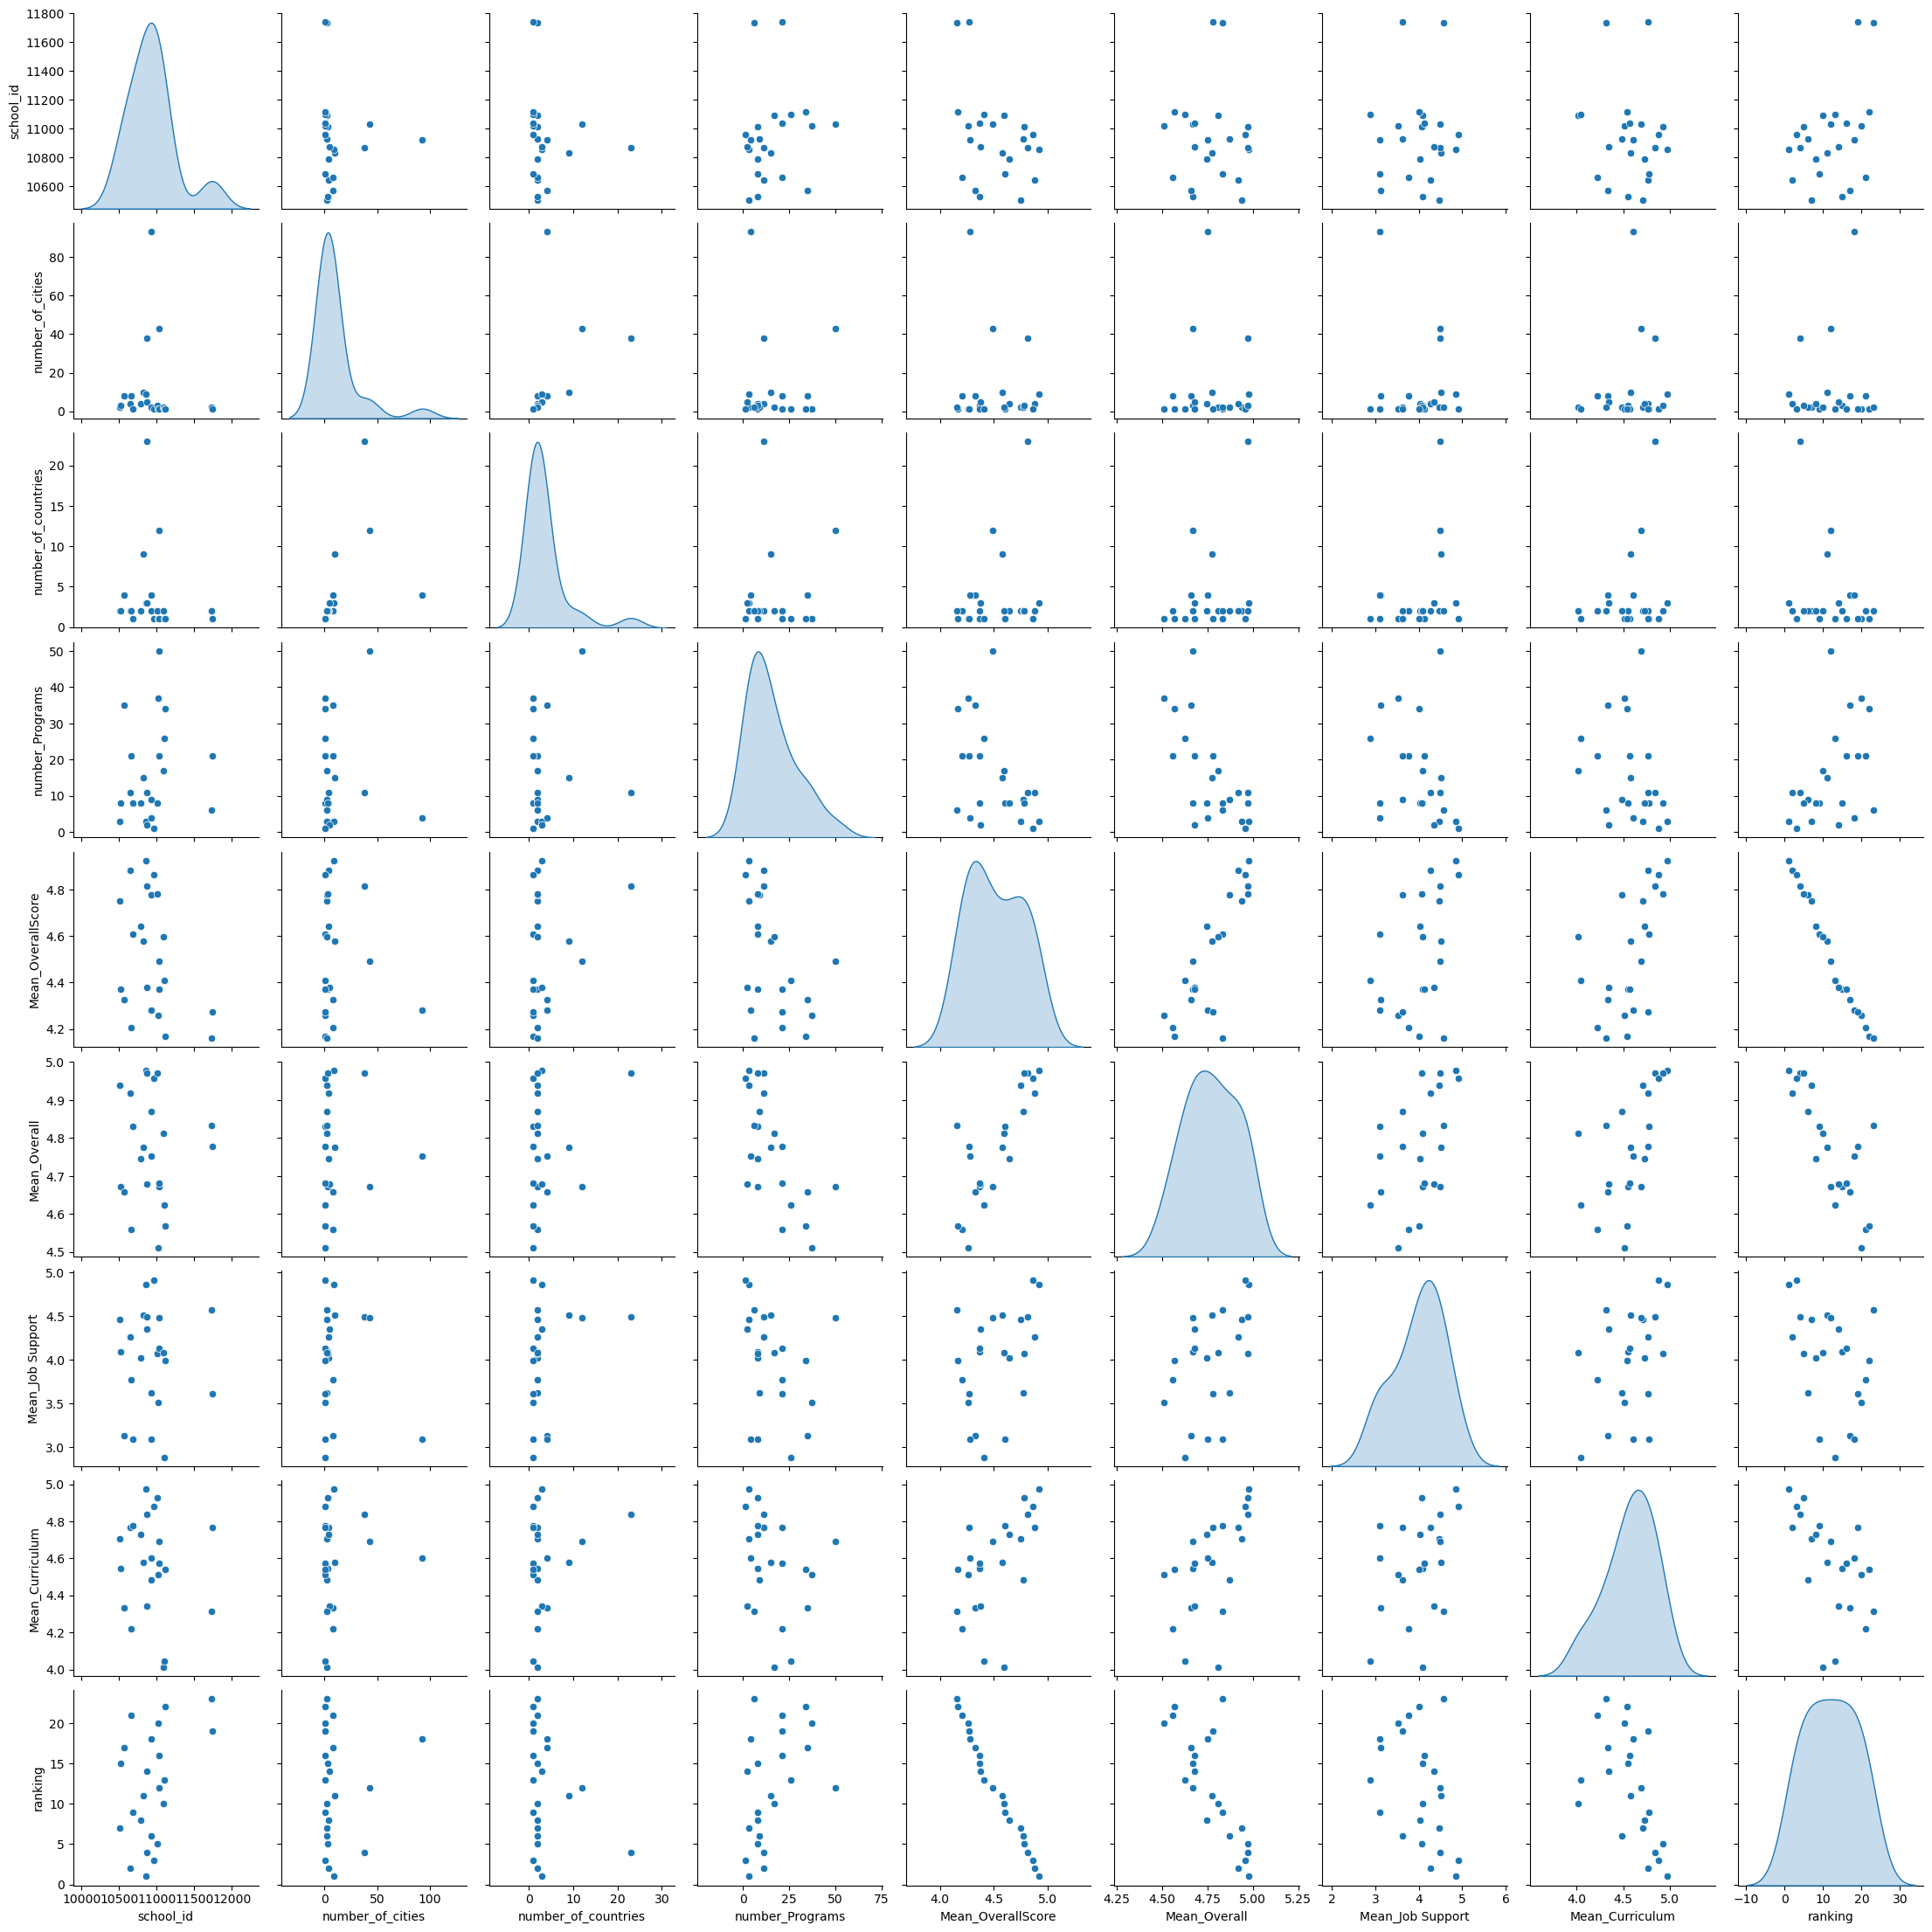

In [281]:
sns.pairplot(grouped_data,diag_kind="kde")
plt.show()

In [318]:
graduating_years = merged_data['graduatingYear'].unique()
sorted_graduating_years = sorted(graduating_years_unique)

print(sorted_graduating_years)

[0, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


In [339]:
# check correlation between graduatingYear, school_id and ovearallScore

correlation_matrix = merged_data[['graduatingYear', 'school_id', 'overallScore']].corr()
print(correlation_matrix)

# 'graduatingYear' and 'school_id' have a weak positive correlation.
# 'school_id' and 'overallScore' have a weak negative correlation.
# 'graduatingYear' and 'overallScore' have a weak positive correlation.

# keep searching :)

                graduatingYear  school_id  overallScore
graduatingYear        1.000000   0.028543      0.025728
school_id             0.028543   1.000000     -0.042764
overallScore          0.025728  -0.042764      1.000000


In [338]:
column_mapping = {
    'city.id': 'number_of_cities',
    'country.id': 'number_of_countries',
    'program': 'number_Programs',
    'overallScore': 'Mean_OverallScore',
    'overall': 'Mean_Overall',
    'jobSupport': 'Mean_Job Support',
    'curriculum': 'Mean_Curriculum',
    'graduatingYear': 'graduatingYear' 
}

grouped_data = merged_data.groupby(['graduatingYear', 'school_id']).agg({
    'city.id': 'nunique',
    'country.id': 'nunique',
    'program': 'nunique',
    'overallScore': 'mean',
    'overall': 'mean',
    'jobSupport': 'mean',
    'curriculum': 'mean'
}).reset_index()

# Create the 'ranking' column
grouped_data['ranking'] = grouped_data['overallScore'].rank(ascending=False)

# Sort the DataFrame by 'ranking'
grouped_data = grouped_data.sort_values(by='ranking')

grouped_data = grouped_data.round({'overallScore': 2, 'overall': 2, 'jobSupport': 2, 'curriculum': 2})
grouped_data = grouped_data.rename(columns=column_mapping)

display(grouped_data.head(30))


,graduatingYear,school_id,number_of_cities,number_of_countries,number_Programs,Mean_OverallScore,Mean_Overall,Mean_Job Support,Mean_Curriculum,ranking
93,2017,10853,9,3,0,5.00,5.00,5.00,5.00,14.5
33,2013,11118,1,1,1,5.00,5.00,5.00,5.00,14.5
43,2014,11091,2,2,1,5.00,5.00,3.33,3.33,14.5
31,2013,11016,1,1,0,5.00,5.00,5.00,5.00,14.5
29,2013,10923,93,4,0,5.00,5.00,5.00,5.00,14.5
28,2013,10788,4,2,1,5.00,5.00,2.50,2.50,14.5
27,2013,10683,1,1,0,5.00,5.00,5.00,5.00,14.5
49,2015,10643,4,2,1,5.00,5.00,0.00,0.00,14.5
51,2015,10683,1,1,1,5.00,5.00,5.00,5.00,14.5
24,2012,11739,1,1,0,5.00,5.00,5.00,5.00,14.5


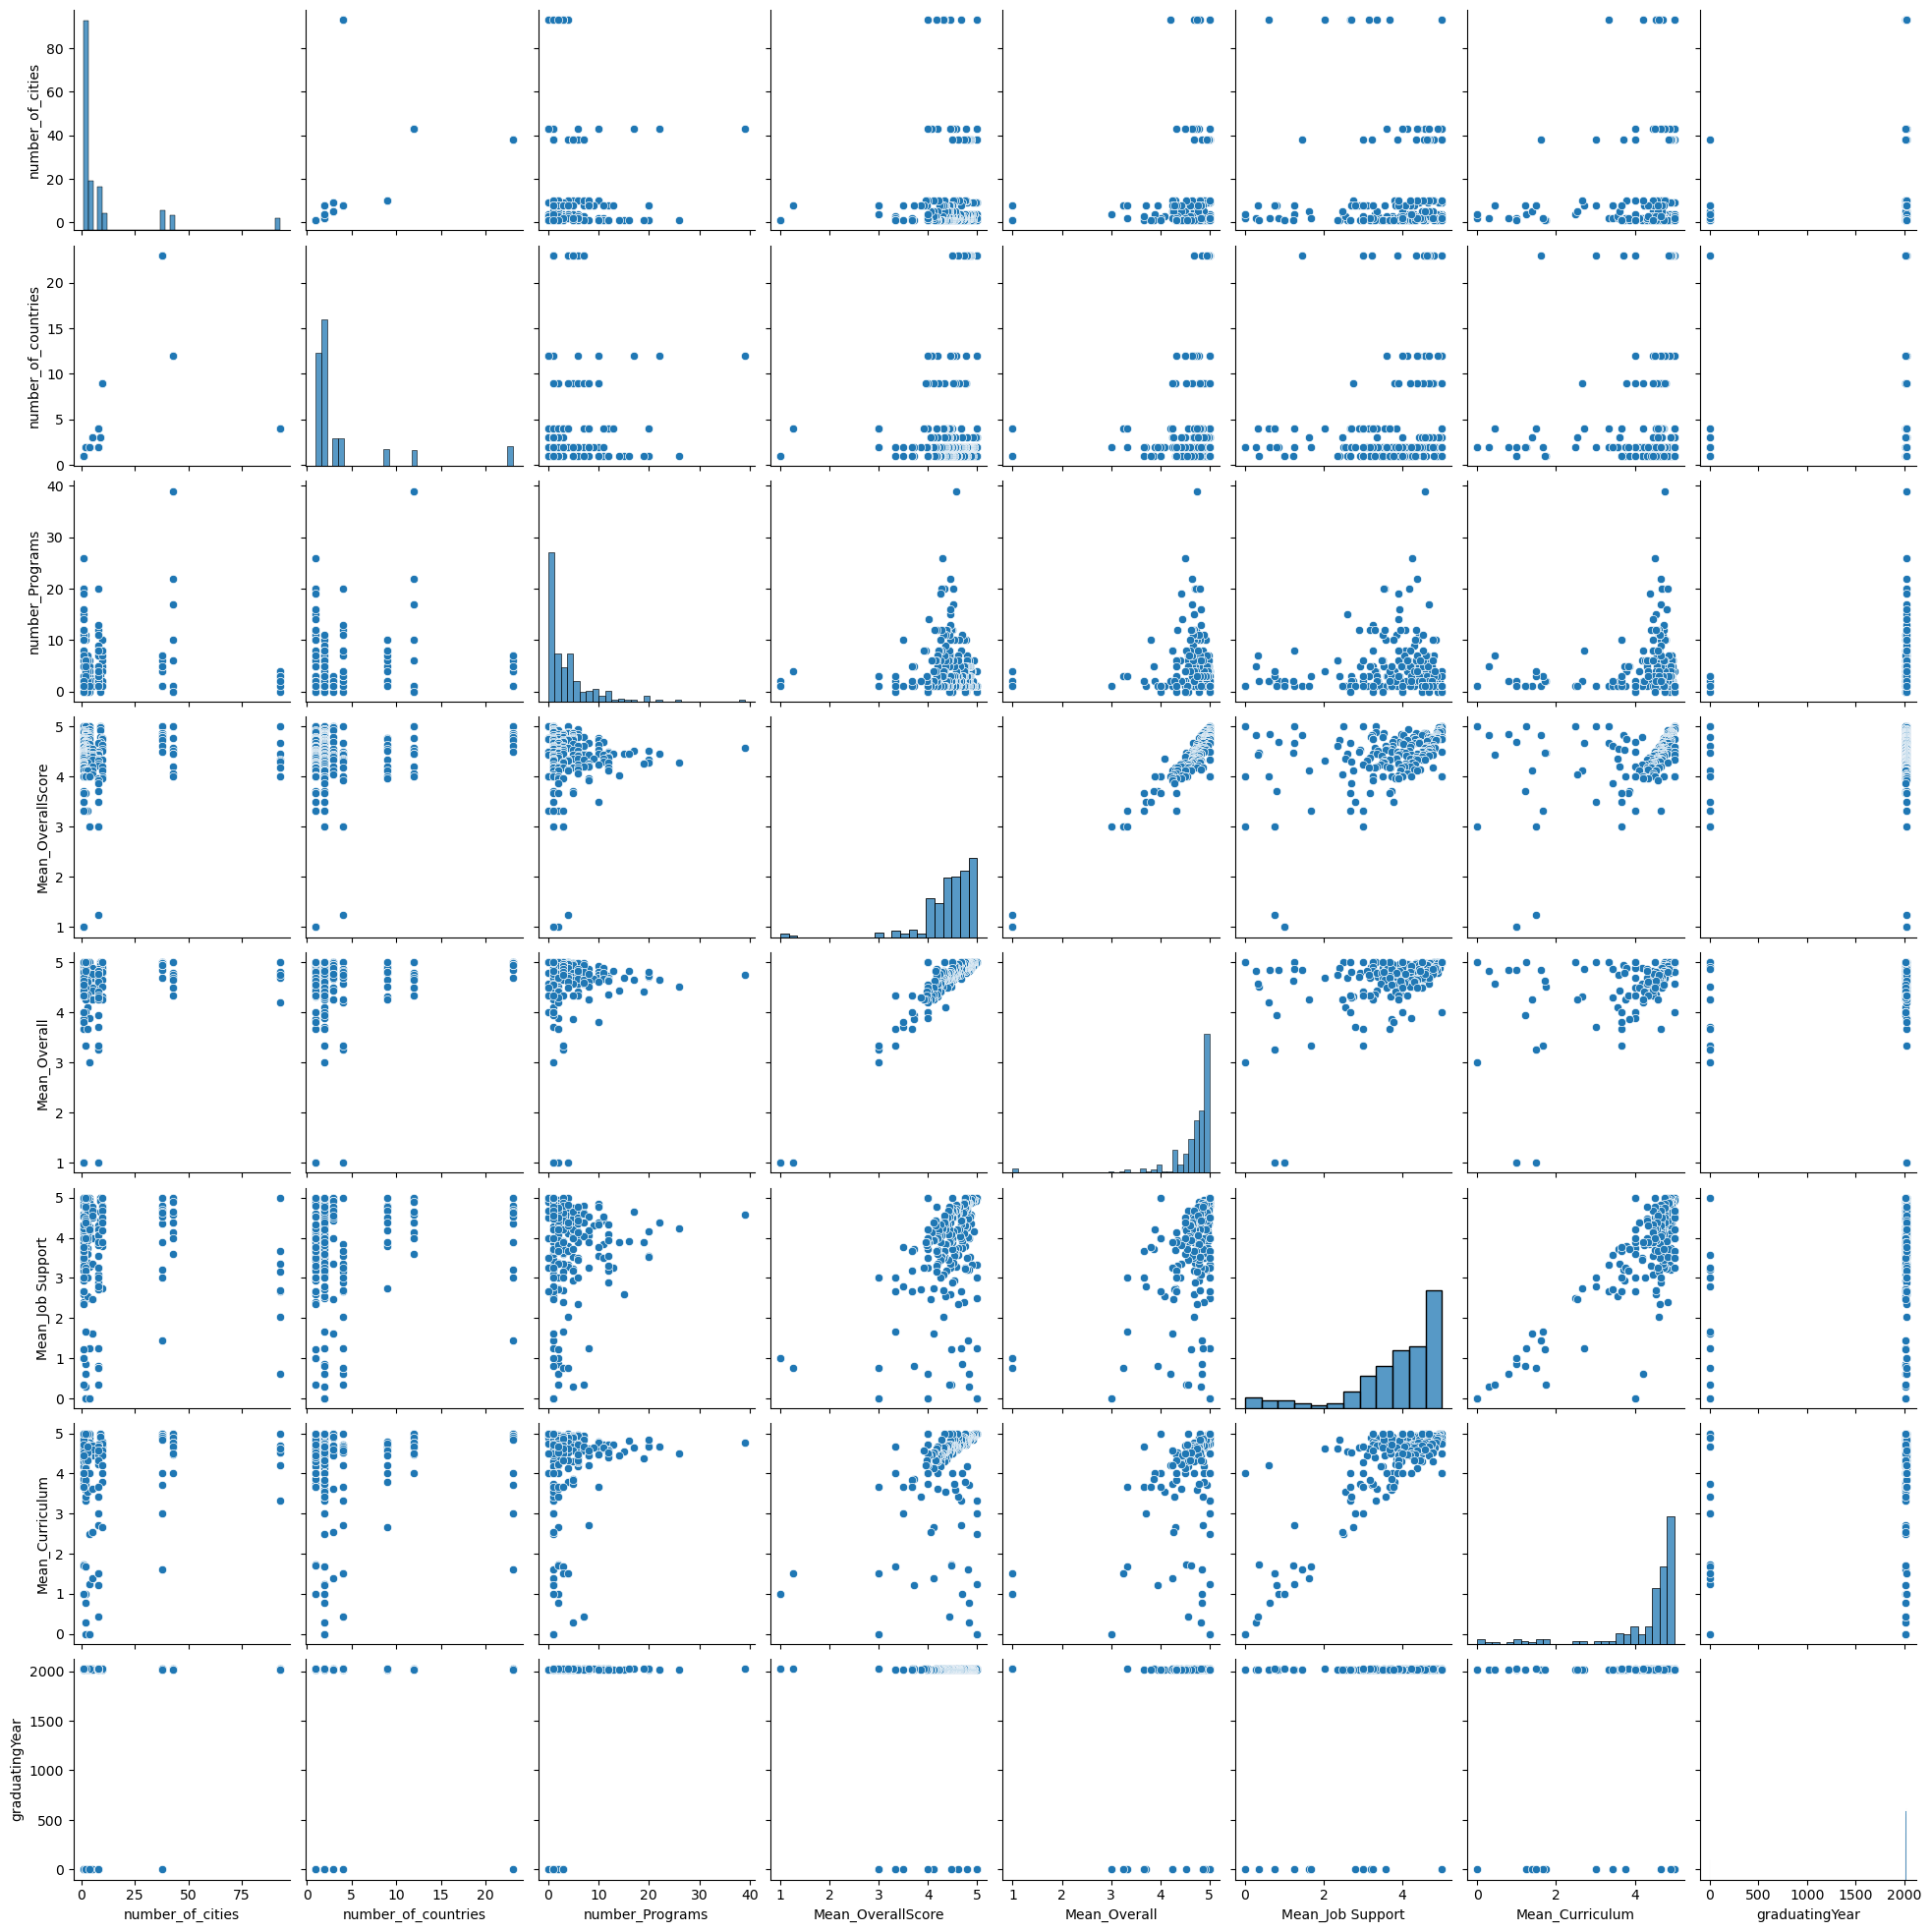

In [341]:
# Previous diagrams do not include 'graduatingYear'. Now we try to plot diagrams with 'graduatingYear' to check if there is a correlation#

numerical_columns = ['number_of_cities', 'number_of_countries', 'number_Programs', 'Mean_OverallScore', 'Mean_Overall', 'Mean_Job Support', 'Mean_Curriculum', 'graduatingYear']

# Subsetting the grouped_data DataFrame
pairplot_data = grouped_data[numerical_columns]

# Create pairplot
sns.pairplot(pairplot_data)
plt.show()

In [ ]:
"""The pairplot shows a notable trend where a lower number of programs offered by schools 
corresponds to a higher overall score. This observation lends support to my initial assumption that 
schools with a more focused range of programs tend to achieve higher overall scores. This pattern 
suggests that concentrating on a core set of offerings may allow schools to enhance the quality of their 
courses, contributing to elevated overall scores."""



In [ ]:
#  suggestion for further research... you may want to xplore whether "online" influcences "oversallScore"
